

# Machine learning-based prediction of COVID-19 diagnosis based on symptoms


A speedy and accurate diagnosis of COVID-19 is made possible by effective SARS-CoV-2 screening, which can also lessen the burden on healthcare systems. There have been built prediction models that assess the likelihood of infection by combining a number of parameters. These are meant to help medical professionals all over the world treat patients, especially in light of the scarcity of healthcare resources. The current dataset has been downloaded from ‘ABC’ government website and contains around 2,78,848 individuals who have gone through the RT-PCR test. Data set contains 11 columns, including 8 features suspected to play an important role in the prediction of COVID19 outcome. Outcome variable is covid result test positive or negative. We have data from 11th March 2020 till 30th April 2020. Please consider 11th March till 15th April as a training and validation set. From 16th April till 30th April as a test set. Please further divide training and validation set at a ratio of 4:1.  


The following list describes each of the dataset’s features used by the model: 


A. Basic information: 

1. ID (Individual ID)

2. Sex (male/female). 

3. Age ≥60 above years (true/false) 

4. Test date (date when tested for COVID)


B. Symptoms: 

5. Cough (true/false).

6. Fever (true/false). 

7. Sore throat (true/false). 

8. Shortness of breath (true/false). 

9. Headache (true/false). 


C. Other information: 

10. Known contact with an individual confirmed to have COVID-19 (true/false).


D. Covid report

11. Corona positive or negative

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore") # ignoring warnings

In [2]:
# importing the dataset and assigning to df

df=pd.read_csv("C:/Users/pavpr/OneDrive/Desktop/Projects/corona_tested_006.csv")
df

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,None,male,Other


In [3]:
# Creating a duplicate copy for data manupulation without disturbing the original dataset and reading the dataset.
df1=df.copy(deep=True)
df1

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,None,male,Other


In [4]:
# Number of rows and columns

df1.shape

(278848, 11)

In [5]:
# number of axis or array dimensions

df1.ndim

2

In [6]:
df1.index

RangeIndex(start=0, stop=278848, step=1)

In [7]:
# extracting all the columns

df1.columns

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

In [8]:
# to find duplicates

print(df1.duplicated().sum())

0


In [9]:
# First n rows of the dataframe

df1.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [10]:
# Last n rows of the dataframe

df1.tail()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
278843,278844,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,None,male,Other
278847,278848,30-04-2020,False,False,False,False,False,negative,None,female,Other


In [11]:
# Concise summary

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [12]:
# reading the count of datatypes of the given dataset

df1.dtypes.value_counts()

object    10
int64      1
dtype: int64

In [13]:
# dealing with missing data
# to check for NaN values
# True for NaN values
# NaN not a number

df1.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

<!-- In the given dataset, there are no null values, it is good for model evaluation -->

In [14]:
# let's check for the unique values in our data

df1.nunique()

Ind_ID                 278848
Test_date                  51
Cough_symptoms              5
Fever                       5
Sore_throat                 5
Shortness_of_breath         5
Headache                    5
Corona                      3
Age_60_above                3
Sex                         3
Known_contact               3
dtype: int64

In [15]:
#viewing the unique values in each column

pd.Series({c: df1[c].unique() for c in df1})

Ind_ID                 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Test_date              [11-03-2020, 12-03-2020, 13-03-2020, 14-03-202...
Cough_symptoms                          [TRUE, FALSE, None, False, True]
Fever                                   [FALSE, TRUE, None, False, True]
Sore_throat                             [TRUE, FALSE, None, False, True]
Shortness_of_breath                     [FALSE, TRUE, None, False, True]
Headache                                [FALSE, TRUE, None, False, True]
Corona                                       [negative, positive, other]
Age_60_above                                             [None, No, Yes]
Sex                                                 [None, male, female]
Known_contact                    [Abroad, Contact with confirmed, Other]
dtype: object

#In the given dataset, there are few columns with different data entries in columns like Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache, I have to make it as either small case or upper case entry.

In [16]:
# checking for the unique values in Known_contact column

df1["Known_contact"].unique()

array(['Abroad', 'Contact with confirmed', 'Other'], dtype=object)

In [17]:
# checking for the unique values in gender(Sex) column

df1["Sex"].unique()

array(['None', 'male', 'female'], dtype=object)

In [18]:
# checking for the unique values in Cough_symptoms column

df1["Cough_symptoms"].unique()

array(['TRUE', 'FALSE', 'None', False, True], dtype=object)

In [19]:
# 1st method

df1["Sore_throat"].value_counts()

False    212584
FALSE     64337
TRUE       1198
True        728
None          1
Name: Sore_throat, dtype: int64

In [20]:
# 2nd method

df1.loc[:,"Sore_throat"].value_counts()

False    212584
FALSE     64337
TRUE       1198
True        728
None          1
Name: Sore_throat, dtype: int64

In [21]:
df1["Sore_throat"]=df1["Sore_throat"].apply(lambda x: False if x=="FALSE" else x)
df1["Sore_throat"]=df1["Sore_throat"].apply(lambda x: True if x=="TRUE" else x)

In [22]:
df1["Sore_throat"].value_counts()

False    276921
True       1926
None          1
Name: Sore_throat, dtype: int64

In [23]:
# Dropping rows with None value in Sore_throat column

df1 = df1[df1.Sore_throat != "None"]

In [24]:
df1["Sore_throat"].value_counts()

False    276921
True       1926
Name: Sore_throat, dtype: int64

In [25]:
df1["Sex"].value_counts()

female    130158
male      129127
None       19562
Name: Sex, dtype: int64

In [26]:
df1["Sex"]=df1["Sex"].apply(lambda x:"unknown" if x=="None" else x)

In [27]:
df1["Sex"].value_counts()

female     130158
male       129127
unknown     19562
Name: Sex, dtype: int64

In [28]:
df1["Age_60_above"].value_counts()

None    127319
No      125703
Yes      25825
Name: Age_60_above, dtype: int64

In [29]:
df1["Age_60_above"]=df1["Age_60_above"].apply(lambda x:"unknown" if x=="None" else x)

In [30]:
df1["Age_60_above"].value_counts()

unknown    127319
No         125703
Yes         25825
Name: Age_60_above, dtype: int64

In [31]:
df1.loc[:,"Corona"].value_counts()

negative    260227
positive     14728
other         3892
Name: Corona, dtype: int64

In [32]:
df1["Cough_symptoms"].value_counts()

False    127531
FALSE    108837
TRUE      21983
True      20245
None        251
Name: Cough_symptoms, dtype: int64

In [33]:
df1["Cough_symptoms"]=df1["Cough_symptoms"].apply(lambda x: False if x=="FALSE" else x)
df1["Cough_symptoms"]=df1["Cough_symptoms"].apply(lambda x: True if x=="TRUE" else x)

In [34]:
# Dropping rows with None value in Cough_symptoms column

df1 = df1[df1.Cough_symptoms != "None"]

In [35]:
df1["Cough_symptoms"].value_counts()

False    236368
True      42228
Name: Cough_symptoms, dtype: int64

In [36]:
df1["Shortness_of_breath"].value_counts()

False    212616
FALSE     64406
TRUE       1104
True        470
Name: Shortness_of_breath, dtype: int64

In [37]:
df1["Shortness_of_breath"]=df1["Shortness_of_breath"].apply(lambda x: False if x=="FALSE" else x)
df1["Shortness_of_breath"]=df1["Shortness_of_breath"].apply(lambda x: True if x=="TRUE" else x)

In [38]:
df1["Shortness_of_breath"].value_counts()

False    277022
True       1574
Name: Shortness_of_breath, dtype: int64

In [39]:
df1["Headache"].value_counts()

False    212100
FALSE     64086
TRUE       1424
True        986
Name: Headache, dtype: int64

In [40]:
df1["Headache"]=df1["Headache"].apply(lambda x: False if x=="FALSE" else x)
df1["Headache"]=df1["Headache"].apply(lambda x: True if x=="TRUE" else x)

In [41]:
df1["Headache"].value_counts()

False    276186
True       2410
Name: Headache, dtype: int64

In [42]:
df1["Fever"].value_counts()

False    137774
FALSE    119069
TRUE      11749
True      10002
None          2
Name: Fever, dtype: int64

In [43]:
df1["Fever"]=df1["Fever"].apply(lambda x: False if x=="FALSE" else x)
df1["Fever"]=df1["Fever"].apply(lambda x: True if x=="TRUE" else x)

In [44]:
# Dropping rows with None value in Fever column

df1 = df1[df1.Fever != "None"]

In [45]:
df1["Fever"].value_counts()

False    256843
True      21751
Name: Fever, dtype: int64

In [46]:
df1.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,unknown,unknown,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,unknown,unknown,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,unknown,unknown,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,unknown,unknown,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,unknown,unknown,Contact with confirmed


In [47]:
df1.to_csv("df1.csv")

In [48]:
# dropping 'Ind_ID' Column.

df1=df1.drop(['Ind_ID'],axis=1)

In [49]:
df1.head()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,11-03-2020,True,False,True,False,False,negative,unknown,unknown,Abroad
1,11-03-2020,False,True,False,False,False,positive,unknown,unknown,Abroad
2,11-03-2020,False,True,False,False,False,positive,unknown,unknown,Abroad
3,11-03-2020,True,False,False,False,False,negative,unknown,unknown,Abroad
4,11-03-2020,True,False,False,False,False,negative,unknown,unknown,Contact with confirmed


In [50]:
df1.shape

(278594, 10)

<!--As per the given problem statement, here I am dividing the data set into two different sets  -->

In [51]:
#changing the datatype of Test_date from object to Datetime
df1['Test_date'] = pd.to_datetime(df1["Test_date"] , format = '%d-%m-%Y')

In [52]:
break_date = pd.Timestamp("2020-04-15")

df_train_valid = df1[df1["Test_date"] <= break_date]
df_test = df1[df1["Test_date"] > break_date]

In [53]:
#get all categorical columns
cat_columns = df1.select_dtypes(['object']).columns

#convert all categorical columns to numeric
df1[cat_columns] = df1[cat_columns].apply(lambda x: pd.factorize(x)[0])

#view updated DataFrame
df1

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,2020-03-11,0,0,0,False,False,0,0,0,0
1,2020-03-11,1,1,1,False,False,1,0,0,0
2,2020-03-11,1,1,1,False,False,1,0,0,0
3,2020-03-11,0,0,1,False,False,0,0,0,0
4,2020-03-11,0,0,1,False,False,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
278843,2020-04-30,1,0,1,False,False,1,0,1,2
278844,2020-04-30,1,0,1,False,False,0,0,2,2
278845,2020-04-30,1,0,1,False,False,0,0,1,2
278846,2020-04-30,1,0,1,False,False,0,0,1,2


In [54]:
# data from 11th march 2020 to 15th april 2020

df_train_valid

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,2020-03-11,True,False,True,False,False,negative,unknown,unknown,Abroad
1,2020-03-11,False,True,False,False,False,positive,unknown,unknown,Abroad
2,2020-03-11,False,True,False,False,False,positive,unknown,unknown,Abroad
3,2020-03-11,True,False,False,False,False,negative,unknown,unknown,Abroad
4,2020-03-11,True,False,False,False,False,negative,unknown,unknown,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
163184,2020-04-15,False,False,False,False,False,negative,unknown,male,Other
163185,2020-04-15,False,False,False,False,False,negative,unknown,male,Other
163186,2020-04-15,False,False,False,False,False,negative,unknown,female,Other
163187,2020-04-15,False,False,False,False,False,negative,unknown,male,Other


# here, I am droping the test_date column as there is no significance in the model evaluation

In [56]:
df_train_valid=df_train_valid.drop(['Test_date'],axis=1)

In [57]:
df_train_valid

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,True,False,True,False,False,negative,unknown,unknown,Abroad
1,False,True,False,False,False,positive,unknown,unknown,Abroad
2,False,True,False,False,False,positive,unknown,unknown,Abroad
3,True,False,False,False,False,negative,unknown,unknown,Abroad
4,True,False,False,False,False,negative,unknown,unknown,Contact with confirmed
...,...,...,...,...,...,...,...,...,...
163184,False,False,False,False,False,negative,unknown,male,Other
163185,False,False,False,False,False,negative,unknown,male,Other
163186,False,False,False,False,False,negative,unknown,female,Other
163187,False,False,False,False,False,negative,unknown,male,Other


In [58]:
#get all categorical columns
cat_columns = df_train_valid.select_dtypes(['object']).columns

#convert all categorical columns to numeric
df_train_valid[cat_columns] = df_train_valid[cat_columns].apply(lambda x: pd.factorize(x)[0])

#view updated DataFrame
df_train_valid

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,0,0,0,False,False,0,0,0,0
1,1,1,1,False,False,1,0,0,0
2,1,1,1,False,False,1,0,0,0
3,0,0,1,False,False,0,0,0,0
4,0,0,1,False,False,0,0,0,1
...,...,...,...,...,...,...,...,...,...
163184,1,0,1,False,False,0,0,1,2
163185,1,0,1,False,False,0,0,1,2
163186,1,0,1,False,False,0,0,2,2
163187,1,0,1,False,False,0,0,1,2


In [59]:
# assigning the features and target variable into x and y in train data

x = df_train_valid[['Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Age_60_above', 'Sex',
       'Known_contact']]
y = df_train_valid.Corona

In [60]:
# data from 16th april to 30th april

df_test

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
163189,2020-04-16,True,False,False,False,False,negative,unknown,female,Abroad
163190,2020-04-16,False,False,False,False,False,negative,unknown,female,Other
163191,2020-04-16,True,False,False,False,False,negative,unknown,female,Abroad
163192,2020-04-16,False,False,False,False,False,negative,unknown,male,Other
163193,2020-04-16,False,False,False,False,False,negative,unknown,male,Other
...,...,...,...,...,...,...,...,...,...,...
278843,2020-04-30,False,False,False,False,False,positive,unknown,male,Other
278844,2020-04-30,False,False,False,False,False,negative,unknown,female,Other
278845,2020-04-30,False,False,False,False,False,negative,unknown,male,Other
278846,2020-04-30,False,False,False,False,False,negative,unknown,male,Other


In [61]:
#get all categorical columns
cat_columns = df_test.select_dtypes(['object']).columns

#convert all categorical columns to numeric
df_test[cat_columns] = df_test[cat_columns].apply(lambda x: pd.factorize(x)[0])

#view updated DataFrame
df_test

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
163189,2020-04-16,0,0,0,False,False,0,0,0,0
163190,2020-04-16,1,0,0,False,False,0,0,0,1
163191,2020-04-16,0,0,0,False,False,0,0,0,0
163192,2020-04-16,1,0,0,False,False,0,0,1,1
163193,2020-04-16,1,0,0,False,False,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
278843,2020-04-30,1,0,0,False,False,2,0,1,1
278844,2020-04-30,1,0,0,False,False,0,0,0,1
278845,2020-04-30,1,0,0,False,False,0,0,1,1
278846,2020-04-30,1,0,0,False,False,0,0,1,1


In [62]:
# Assigning the features and target variables into x and y in test data

x = df_test[['Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Age_60_above', 'Sex',
       'Known_contact']]
y = df_test.Corona

In [63]:
# Importing train_test_split from sklearn

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=0)

In [64]:
# StandardScaler follows Standard Normal Distribution (SND).
# Therefore, it makes mean = 0 and scales the data to unit variance. 

from sklearn.preprocessing import StandardScaler
st_x = StandardScaler()
x_train = st_x.fit_transform(x_train)
x_test = st_x.transform(x_test)

# Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [66]:
# LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(x_train, y_train)
# Prediction
y_pred = clf.predict(x_test)
  
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)


# confusion matrix

cm=confusion_matrix(y_test,y_pred)

print(cm)

Logistic Regression model accuracy (in %): 97.15977866159433
[[22183     0   105]
 [  309     0     9]
 [  234     0   292]]


Text(0.5, 1.0, 'confusion matrix')

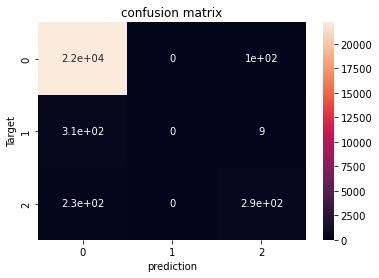

In [67]:
plt.figure()
sns.heatmap(cm,annot=True)
plt.xlabel("prediction")
plt.ylabel("Target")
plt.title("confusion matrix")

# KNN 

In [68]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  
classifier.fit(x_train, y_train) 
y_pred= classifier.predict(x_test)

In [69]:
acc = accuracy_score(y_test, y_pred)
print("KNN model accuracy (in %):", acc*100)

KNN model accuracy (in %): 97.16410167733011


# Random Forest Classifier

In [70]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [71]:
y_pred= classifier.predict(x_test)

In [72]:
print(accuracy_score(y_test,y_pred))


0.9715113263012277


# Decision Tree Classifier

In [73]:
from sklearn.tree import DecisionTreeClassifier # Importing Decision Tree Classifier
from sklearn import metrics #Importing scikit-learn metrics module for accuracy calculation
from sklearn import tree

# Create Decision Tree classifer object
dt = DecisionTreeClassifier(criterion="entropy", max_depth = 3)

# Train Decision Tree Classifer
dt = dt.fit(x_train,y_train)
#printing and defining Decision Tree

In [74]:
acc = accuracy_score(y_test, y_pred)
print("Decision Tree model accuracy (in %):", acc*100)

Decision Tree model accuracy (in %): 97.15113263012277


# Making Predictive System

In [75]:
input_data = (1,1,1,0,1,1,2,2)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = st_x.transform(input_data_reshaped)
print(std_data)

prediction = dt.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is corona negative')
else:
  print('The person is corona positive')

[[ 3.57395671e-01  4.02352362e+00  6.97770887e+01 -1.31511370e-02
   6.48442189e+01  1.00000000e+00  2.79919750e+00  3.62280432e+00]]
[2]
The person is corona positive


# My conclusion on the given dataset is that, i have achieved 97% accuracy from all the above 4 models, i can gohead with any of the model for deployment.

<!-- Here, I am concluding all the above modules has given me the accuracy score of 97%, so i can gohead with any of the above model for deployment. -->